# Q-Learning implementation

## import libraries

In [2]:
import gym
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

## Load FrozenLake environment with slippery 

In [3]:
env = gym.make("FrozenLake-v0", is_slippery = True)

## q_learning function for calculate state-action values (Q) on each episode 

In [4]:
def q_learning(env,s,alpha,gamma):
  done = False
  while not done:
    action = np.argmax(q_value[s]) if random.random()>0.3 else env.action_space.sample()
    observation, reward, done, _ = env.step(action)
    q_value[s][action] = q_value[s][action] + alpha * (reward + gamma * max(q_value[observation]) - q_value[s][action])
    s = observation

## implement Q-learning

### we have 100 iteration and 5000 episode in each iteration to find optimal policy and test this policy for 50 times 

In [5]:
w_r = []
EPISODE_NUM = 5000
TEST_NUM = 50
alpha = 0.1
gamma = 0.9
for k in tqdm(range(100)):
  q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
  win_rates = []
  for j in range(EPISODE_NUM):
    env.reset()
    s= env.s
    q_learning(env,s,alpha,gamma)
    policy = [np.argmax(actions) for actions in q_value]
    win_rate = 0
    steps = [0 for i in range(TEST_NUM)]
    for i in range(TEST_NUM):
      env.reset()
      done = False
      s = 0
      while not done:
        s, r, done, _ = env.step(policy[s])
        steps[i] += 1
      if r>0:
        win_rate += 1
    win_rates.append(win_rate/100)
  w_r.append(win_rates)

100%|██████████| 100/100 [2:52:36<00:00, 103.56s/it]


after 2h:52m:36s , we have final policy

In [6]:
print(policy)

[2, 3, 0, 3, 0, 0, 2, 0, 3, 1, 1, 0, 0, 1, 1, 0]


u can see mean of win rates on each iteration

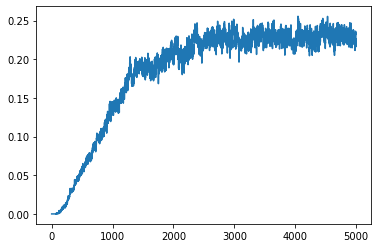

In [7]:
plt.plot(np.mean(w_r, axis = 0))